In [1]:
import pandas as pd

In [2]:
import numpy as np

In [33]:
import seaborn as sns

In [7]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [3]:
df=pd.read_csv("news.csv")


In [4]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [9]:
df.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


In [10]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [14]:
labels=df.label

In [15]:
labels

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

Fake news refers to false or misleading information presented as if it were true. This disinformation can take various forms, including written articles, images, videos, or social media posts, and it is often spread through online platforms and social media networks.

Fake news is created for various reasons, such as:

Misinformation: Some individuals or groups intentionally create false information to deceive the public, advance a particular agenda, or damage the reputation of a person, organization, or group.

Sensationalism: Some news outlets or websites may publish fake news to generate attention, increase website traffic, and generate ad revenue.

Political Manipulation: Fake news can be used for political purposes, such as spreading false information about political opponents, undermining the credibility of institutions, or manipulating public opinion.

Hoaxes: Some fake news stories are created purely for entertainment or as pranks, although they can still have unintended consequences.

Profit: Some people create fake news stories to make money through advertising revenue or click-throughs on their websites or social media profiles.

In [11]:
df.columns

Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [12]:
df.shape

(6335, 4)

#  Model Building

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], labels, test_size=0.20, random_state=42)

In [19]:
tf_idf_vectorizer=TfidfVectorizer(stop_words='english',max_df=0.7)

The TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is a popular text preprocessing technique used in natural language processing (NLP) and information retrieval. It's primarily used to convert a collection of text documents into numerical feature vectors that can be used for machine learning and text analysis tasks. TF-IDF is a way to represent the importance of words or terms in a document relative to a corpus of documents.

Here's how TF-IDF works:

Term Frequency (TF): This component calculates how frequently a term (word) occurs in a specific document. It is calculated as the ratio of the number of times a term appears in a document to the total number of terms in that document. A higher TF score indicates that a term is more important within the document.

Inverse Document Frequency (IDF): The IDF component measures the importance of a term in the entire corpus of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the term. Terms that are common across many documents have lower IDF values, while terms that are unique to a few documents have higher IDF values.

TF-IDF Score: The TF-IDF score for a term in a document is calculated by multiplying its TF and IDF scores. This score quantifies the importance of a term within a specific document relative to its importance across the entire corpus.

The TF-IDF vectorizer processes a collection of documents, such as a set of articles, books, or web pages, and converts each document into a numerical vector. Each element in the vector corresponds to the TF-IDF score of a specific term within the document.

TF-IDF has various applications, including text classification, information retrieval, document clustering, and more. It helps in identifying important terms or keywords within documents and is particularly useful for tasks like content recommendation, search engines, and sentiment analysis

In [20]:
tfidf_train=tf_idf_vectorizer.fit_transform(X_train)

In [21]:
tfidf_test=tf_idf_vectorizer.transform(X_test)

The Passive-Aggressive Classifier is a machine learning algorithm used for binary and multiclass classification tasks. It belongs to the family of online learning algorithms, which means it processes data one instance at a time, making it well-suited for scenarios where data is continuously arriving or where you have limited computational resources for batch processing. The algorithm is particularly useful for tasks like text classification and sentiment analysis.

The "Passive-Aggressive" name comes from the behavior of the algorithm during training. It aims to make correct predictions for the training data while being passive when it's right and aggressive when it's wrong. In other words, it adjusts its model only when it makes a mistake.

Here's a high-level overview of how the Passive-Aggressive Classifier works:

Initialization: The algorithm starts with an initial model, typically with random or zero weights.

Training: For each training instance, the model makes a prediction. If the prediction is correct (i.e., the instance is classified correctly), the model remains passive, and no changes are made to the weights. If the prediction is incorrect, the model becomes aggressive and updates its parameters to correct the mistake.

Loss Function: The loss function used to update the model is typically based on the margin between the predicted class and the true class. The algorithm tries to minimize this loss by adjusting the model's parameters.

Regularization: Regularization is often used to prevent overfitting. L2 regularization is commonly applied to the model's parameters.

The Passive-Aggressive Classifier has different variants, such as Passive-Aggressive I (PA-I) and Passive-Aggressive II (PA-II), which differ in terms of how they handle the aggressive updates. PA-I tends to be less aggressive than PA-II.

In [22]:
pac=PassiveAggressiveClassifier()

In [23]:
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier()

In [28]:
y_pred=pac.predict(tfidf_test)

In [29]:
accuracy_score(y_test,y_pred)

0.9376479873717443

In [31]:
cm=confusion_matrix(y_test,y_pred)


<AxesSubplot:>

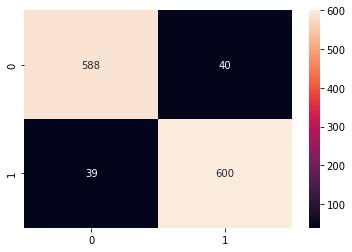

In [35]:
sns.heatmap(data=cm,annot=True,fmt='d')